In [ ]:
!unzip /content/final_project_udacity.zip

In [4]:
!pip install pycaret

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 167 kB 49.3 MB/s 
     |████████████████████████████████| 114 kB 60.0 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 2.0 MB 46.6 MB/s 
     |████████████████████████████████| 261 kB 41.7 MB/s 
     |████████████████████████████████| 6.8 MB 35.2 MB/s 
     |████████████████████████████████| 102 kB 10.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 675 kB 50.6 MB/s 
     |████████████████████████████████| 3.1 MB 31.8 MB/s 
     |████████████████████████████████| 10.9 MB 45.3 MB/s 
     |████████████████████████████████| 303 kB 51.0 MB/s 
     |████████████████████████████████| 636 kB 59.6 MB/s 
     |██████████████████

In [1]:
import pandas as pd
import sys
import numpy as np
import pickle
from pycaret.classification import * 
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../tools/")
from final_project.tester import dump_classifier_and_data
from tools.feature_format import featureFormat, targetFeatureSplit


# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from final_project.tester import test_classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances',
                 'bonus', 'restricted_stock_deferred', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'to_messages', 'from_poi_to_this_person', 'from_messages',
                 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

### Load the dictionary containing the dataset
with open("/content/final_project/final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)



/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)

In [3]:
### converting the data to df for some analysis and exploration
my_data = pd.DataFrame(data, columns=features_list)
my_data.head()

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
0,0.0,201955.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,0.0,2902.0,47.0,2195.0,65.0,1407.0
1,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,477.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,0.0,1757552.0,0.0,566.0,39.0,29.0,0.0,465.0
3,0.0,267102.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,239671.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,129142.0,0.0,69.0,0.0,145796.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
### creating a new feature
my_data['pct_amount_paid_from_bonus'] = my_data['bonus']/ my_data['total_payments']

In [5]:
my_data.fillna(0, inplace=True)

In [6]:
my_data.head()

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,pct_amount_paid_from_bonus
0,0.0,201955.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,0.0,2902.0,47.0,2195.0,65.0,1407.0,0.930997
1,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,477.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,0.0,1757552.0,0.0,566.0,39.0,29.0,0.0,465.0,0.000000
3,0.0,267102.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212980
4,0.0,239671.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,129142.0,0.0,69.0,0.0,145796.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483269


In [14]:
# inspect info
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   poi                         145 non-null    float64
 1   salary                      145 non-null    float64
 2   deferral_payments           145 non-null    float64
 3   total_payments              145 non-null    float64
 4   loan_advances               145 non-null    float64
 5   bonus                       145 non-null    float64
 6   restricted_stock_deferred   145 non-null    float64
 7   deferred_income             145 non-null    float64
 8   total_stock_value           145 non-null    float64
 9   expenses                    145 non-null    float64
 10  exercised_stock_options     145 non-null    float64
 11  other                       145 non-null    float64
 12  long_term_incentive         145 non-null    float64
 13  restricted_stock            145 non

In [15]:
### find how many values are missing in each column
selected_features_missing = []
for col in features_list[1:]:
  missing_vals = len(my_data[col][np.where(my_data[col]==0)[0]])
  total_vals = len(my_data[col])
  ptc_missing = missing_vals / total_vals
  if ptc_missing < 0.25:
    selected_features_missing.append(col)
  print(f'{col} = {ptc_missing:.2f}%')

salary = 0.34%
deferral_payments = 0.73%
total_payments = 0.14%
loan_advances = 0.97%
bonus = 0.43%
restricted_stock_deferred = 0.88%
deferred_income = 0.66%
total_stock_value = 0.13%
expenses = 0.34%
exercised_stock_options = 0.30%
other = 0.36%
long_term_incentive = 0.54%
restricted_stock = 0.24%
director_fees = 0.88%
to_messages = 0.41%
from_poi_to_this_person = 0.49%
from_messages = 0.41%
from_this_person_to_poi = 0.54%
shared_receipt_with_poi = 0.41%


In [16]:
selected_features_missing

['total_payments', 'total_stock_value', 'restricted_stock']

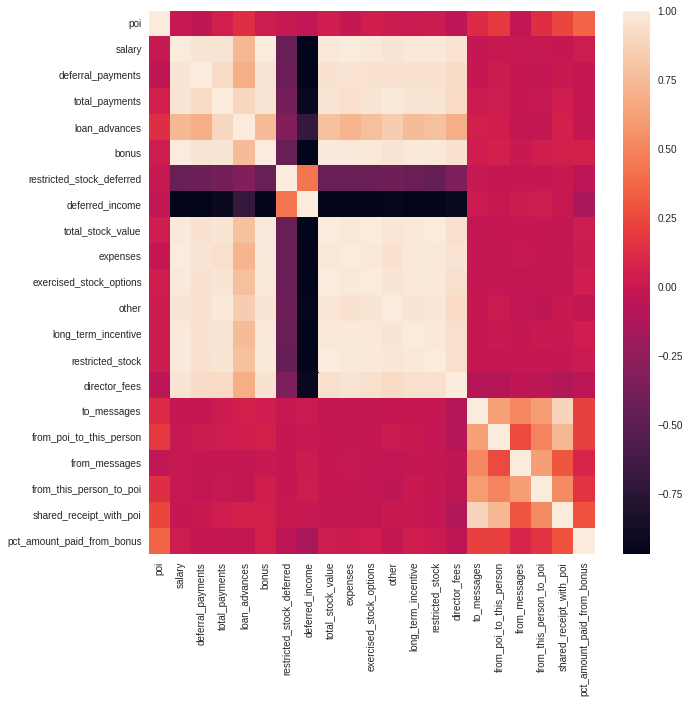

In [17]:
### find the correlation in features
plt.figure(figsize=(10, 10))
sns.heatmap(my_data.corr());

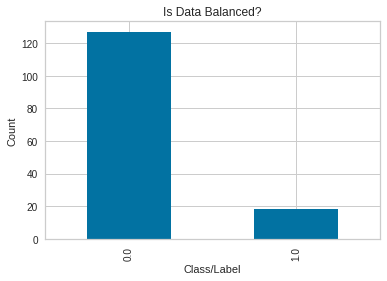

In [ ]:
### is data really balanced?
plt.title('Is Data Balanced?')
plt.xlabel('Class/Label')
plt.ylabel('Count')
my_data['poi'].value_counts().plot.bar();

In [ ]:
pd.DataFrame(data_dict).T['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

Data is very much imbalanced and more biased to class 0.

In [ ]:
### Task 2: Remove outliers
### Task 3: Create new feature(s)

### modeling experiments
1. Take all the data as it is and find the baseline model.

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [ ]:
experiment = setup(my_data, target='poi')  
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8418,0.7771,0.35,0.2917,0.3133,0.2520,0.2532,0.096
nb,Naive Bayes,0.4245,0.6125,0.80,0.1731,0.2718,0.0696,0.1189,0.017
lightgbm,Light Gradient Boosting Machine,0.8518,0.7979,0.30,0.2500,0.2667,0.2154,0.2167,0.067
gbc,Gradient Boosting Classifier,0.8327,0.7299,0.20,0.2500,0.2167,0.1426,0.1454,0.155
lr,Logistic Regression,0.8218,0.6243,0.20,0.2000,0.1833,0.1035,0.1140,0.429
dt,Decision Tree Classifier,0.7636,0.5438,0.25,0.1583,0.1833,0.0543,0.0639,0.016
ridge,Ridge Classifier,0.8436,0.0000,0.15,0.2250,0.1667,0.1086,0.1189,0.016
lda,Linear Discriminant Analysis,0.8336,0.6722,0.15,0.2250,0.1667,0.1043,0.1134,0.018
qda,Quadratic Discriminant Analysis,0.7918,0.6799,0.05,0.0500,0.0500,-0.0109,-0.0217,0.017
et,Extra Trees Classifier,0.8218,0.7229,0.05,0.0500,0.0500,-0.0052,-0.0063,0.465


In [ ]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

#### best model found in first experiment
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [12]:
scaller = MinMaxScaler()

best_model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

#### model training and evaluation

In [18]:
### testing the best model with tester code
### splitting the selected data into X(features-independent vars) and y (labels-dependent vars)
labels, features = targetFeatureSplit(my_data.values)

### ### scalling the data
features_scalled  = scaller.fit_transform(features)


### split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(features_scalled, labels, test_size=0.2, random_state=42)

In [19]:
### train the model 
best_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=8895)

In [23]:
### evaluate the model on testing data
### accuracy
preds = best_model.predict(X_test)

acc = best_model.score(X_test, y_test)
print('Accuracy=', acc)

prec = precision_score(y_test, preds)
print('Precision=', prec)

recall = recall_score(y_test, preds)
print('Recall=', recall)


Accuracy= 0.8620689655172413
Precision= 0.5
Recall= 0.5


In [9]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

precision, recall, accuracy = test_classifier(best_model, my_dataset, features_list, folds=200)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print()

Precision: 0.3824451410658307
Recall: 0.305
Accuracy: 0.8416666666666667



In [ ]:
dump_classifier_and_data()